# Project ID - #CC69853

Project Title - Customer Segmentation with K-Means Clustering

Aim - Apply K-Means clustering to segment customers based on their purchase behavior.

Description- Use a customer purchase dataset to identify distinct segments using the K-Means
clustering algorithm.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
data=pd.read_csv("/home/mustafa/internship/CodeClause · Internship/CodeClauseInternship_Customer Segmentation with K-Means Clustering/Datasets/Mall_Customers.csv")
df=pd.DataFrame(data)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.duplicated().sum()

0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


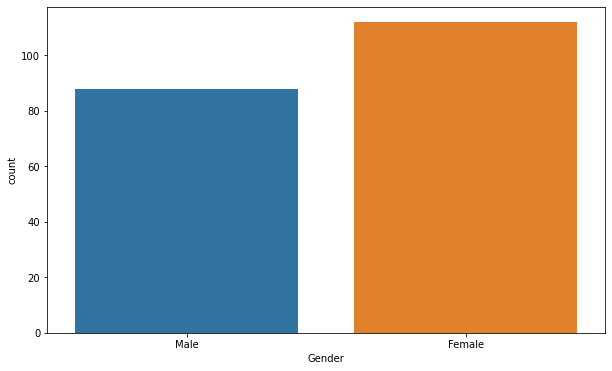

In [8]:
plt.figure(figsize=(10, 6))
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

<Figure size 1152x720 with 0 Axes>

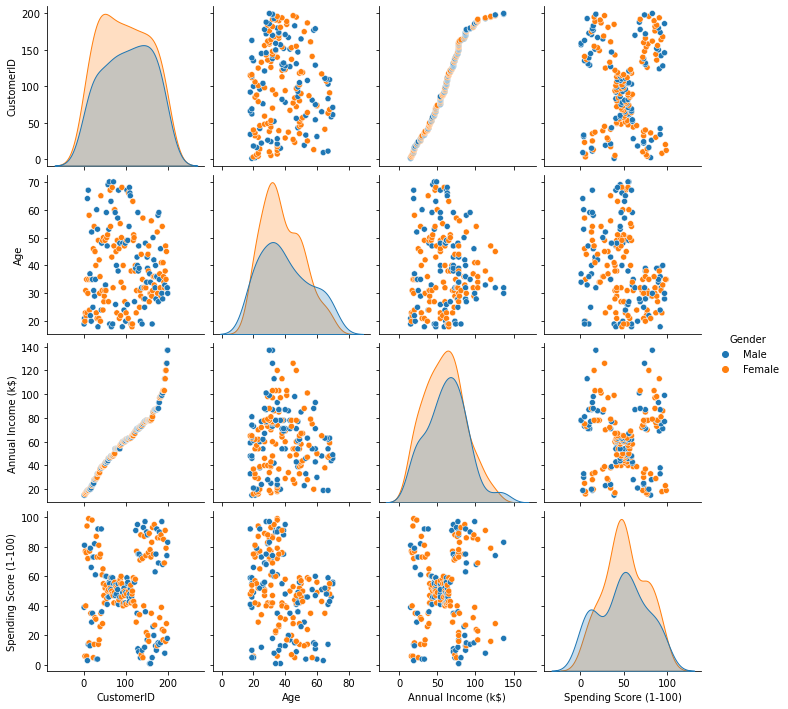

In [9]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

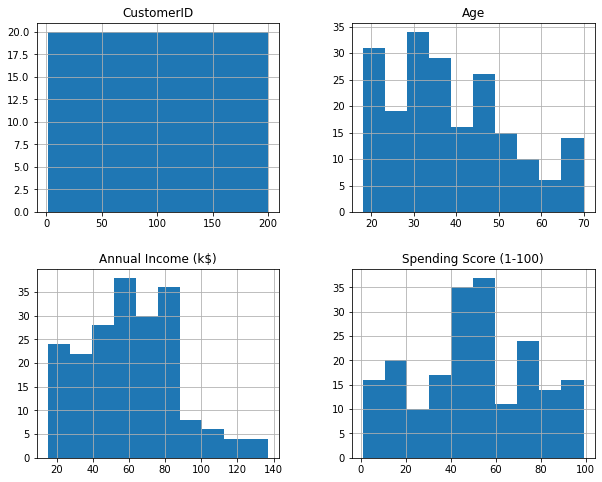

In [10]:
df.hist(figsize=(10, 8))

<AxesSubplot:>

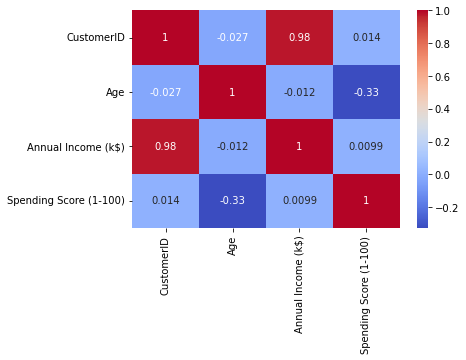

In [11]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

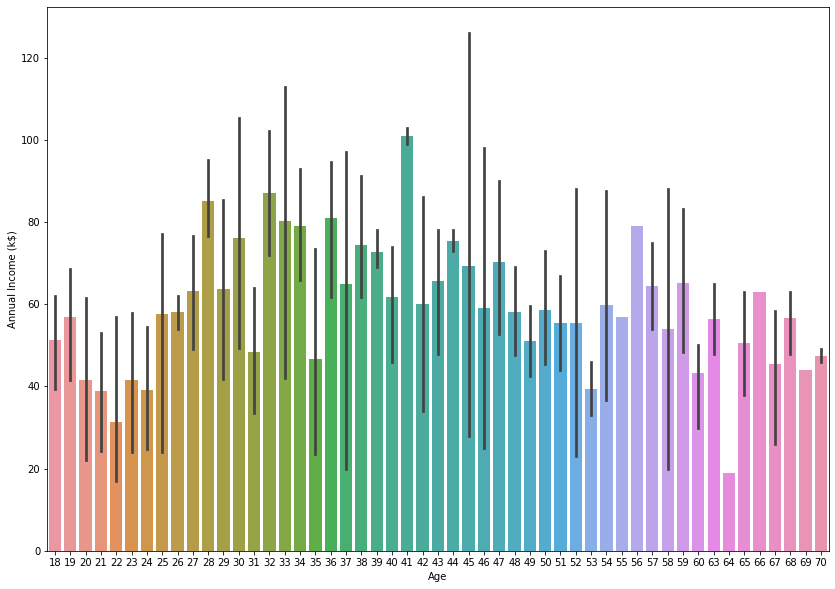

In [12]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df,x="Age",y="Annual Income (k$)")

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

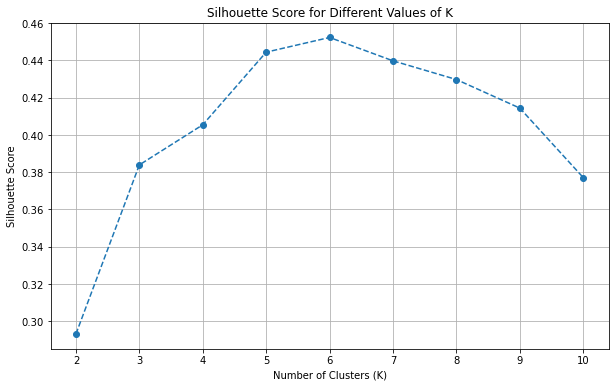

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.grid(True)
plt.show()

In [16]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 as the range started from 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

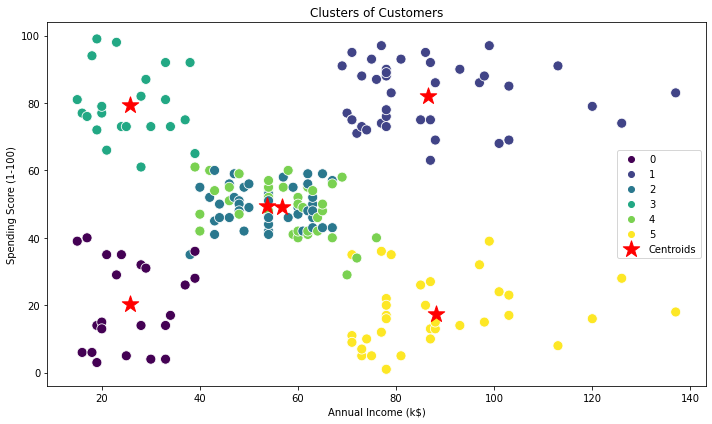

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=kmeans.labels_, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.tight_layout()

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids.index.name = 'Cluster'
centroids


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,44.318182,25.772727,20.272727
1,32.692308,86.538462,82.128205
2,56.340909,53.704545,49.386364
3,25.272727,25.727273,79.363636
4,27.000000,56.657895,49.131579
5,41.685714,88.228571,17.285714


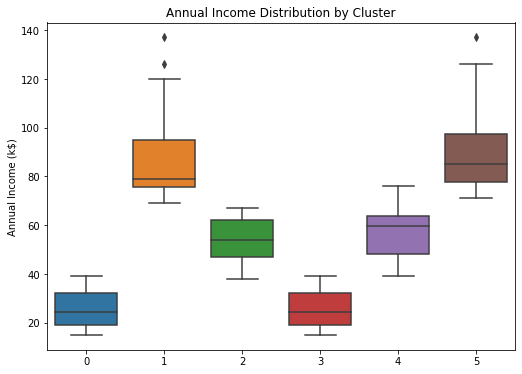

In [19]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=kmeans.labels_, y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Cluster')
plt.tight_layout()

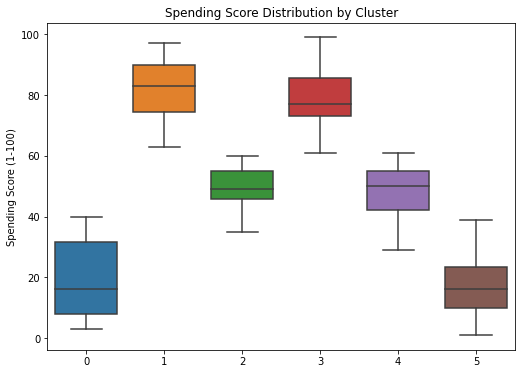

In [20]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.boxplot(x=kmeans.labels_, y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Cluster')
plt.tight_layout()

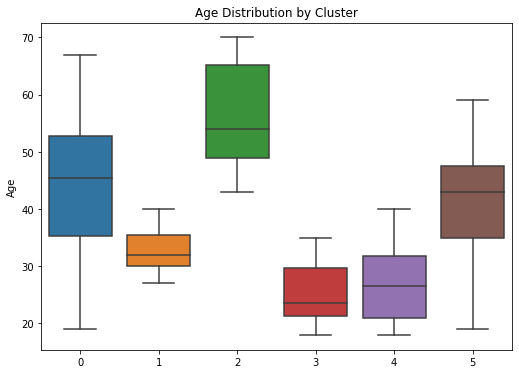

In [21]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
sns.boxplot(x=kmeans.labels_, y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.tight_layout()

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids.index.name = 'Cluster'
data=centroids
data


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,44.318182,25.772727,20.272727
1,32.692308,86.538462,82.128205
2,56.340909,53.704545,49.386364
3,25.272727,25.727273,79.363636
4,27.000000,56.657895,49.131579
5,41.685714,88.228571,17.285714


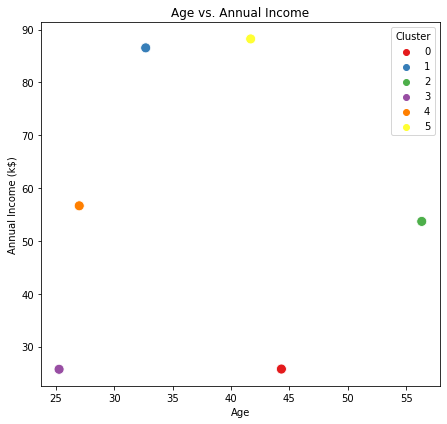

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1', s=100)
plt.title('Age vs. Annual Income')
plt.tight_layout()

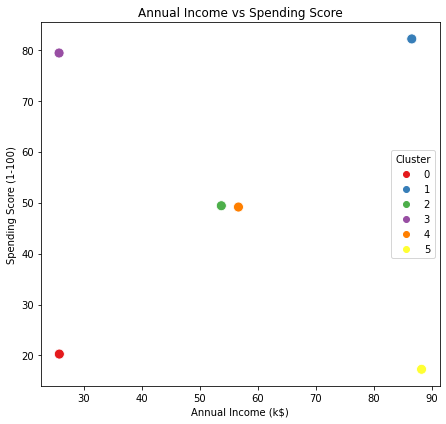

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Annual Income vs Spending Score')
plt.tight_layout()

In [25]:
from mpl_toolkits.mplot3d import Axes3D
df=pd.DataFrame(data)
df

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,44.318182,25.772727,20.272727
1,32.692308,86.538462,82.128205
2,56.340909,53.704545,49.386364
3,25.272727,25.727273,79.363636
4,27.000000,56.657895,49.131579
5,41.685714,88.228571,17.285714


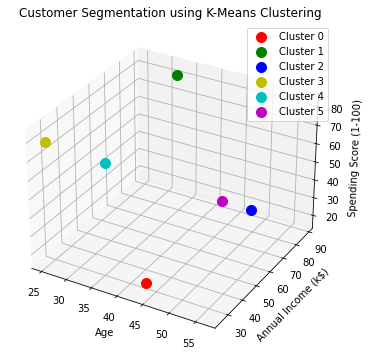

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm']

for cluster, color in enumerate(colors):
    ax.scatter(df['Age'][cluster],
               df['Annual Income (k$)'][cluster],
               df['Spending Score (1-100)'][cluster],
               c=color,
               label=f'Cluster {cluster}',
               s=100)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation using K-Means Clustering')

plt.legend()
plt.show()